In [1]:
import pandas as pd
import glob
from nltk.corpus import stopwords
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
# I load 101 pages for testing
list_of_files=glob.glob('./cdips_dell_test/*.txt')
#each page is cleaned to be a huge string, by lnyx in bash. Put all the strings in a list
allwords=[]
for i in range(len(list_of_files)):
    file=open(list_of_files[i],'r')
    raw=file.read().strip('\n')
    allwords.append(raw)


In [5]:
#an example of the words from a page
print("Total number of files is {}".format(len(allwords)))
print("One example is")
print(allwords[6])

Total number of files is 499
One example is
 for hours only get tremendous savings up to off shop now dell o sign in click to chat or call us shop support community search financing live chat or call available contracts coupons join dell advantage rewards price match for work laptops latitude series latitude series ultrabook tm e ajax loader gif intel core latitude series ultrabook tm e high end performance in a thin light design latitude durability and security packed into a sleek ultrabook tm featuring th gen intel core tm processors windows pro and an optional touchscreen display call for pricing gallery configurations features design ratings reviews drivers manuals support return to top chipset integrated with the cpu lynx point lp intel responsiveness technologies optional intel rapid start technology optional intel smart connect technology require mobile solid state drive graphics card intel integrated hd graphics display cm hd x anti glare led backlit connectivity gigabit ethern

In [6]:
#load the stop words, and add word 'dell' to the list, show what is in the stop words.
stops=stopwords.words("english")
stops.append('dell')
stops

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 '

In [7]:
#load the bag_of_words method from sklearn, set the features to be 200, and get the word features 
#by calling the fit_transform method
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer='word',stop_words=stops, max_features= 200)
words_features = vectorizer.fit_transform(allwords)

In [8]:
#show the dimension of the words features, a 2D array, each row coresponds to each page.
# columns are the most popular words frequency 
words_features=words_features.toarray()
words_features.shape

(499, 200)

In [9]:
#show the feature words and their counts
key_words = vectorizer.get_feature_names()
words_count=np.sum(words_features,axis=0)

for tag, count in zip(key_words,words_count):
    print(tag, count)

access 884
accessories 606
add 1103
ads 884
advantage 2506
apply 1333
atom 895
available 1734
back 2909
balance 720
battery 782
bit 866
business 4724
buy 921
call 1000
card 1355
cart 757
celeron 961
chat 1413
choose 1921
click 638
cm 618
code 1164
com 968
community 1355
contact 732
core 3120
credit 2579
customer 772
customers 573
customize 883
data 1807
date 570
day 1259
days 1487
dbc 698
ddr 560
design 647
desktop 1082
display 755
double 605
drive 2406
drives 597
dual 1044
email 676
emails 887
energy 595
english 900
enterprise 553
environment 729
environmental 637
except 591
factor 763
features 869
financing 1554
fips 648
form 1582
free 2001
full 844
gb 4152
gen 552
generation 770
get 2809
ghz 613
gif 574
graphics 807
hard 1585
hardware 981
hd 841
height 913
help 2076
high 677
home 1215
includes 763
information 741
inside 4025
inspiron 1153
integrated 698
intel 6862
internal 611
issues 619
itanium 878
keyboard 786
kg 641
laptop 789
latitude 812
law 601
lbs 620
learn 723
legal 898
logo

In [8]:
#initialize the kmeans clustering methods, and cluster the words_features to 5 classes 
#kmeans_clustering=KMeans(n_clusters=6,n_jobs=-1, random_state=14)
#prediction_clusters=kmeans_clustering.fit_predict(words_features)

In [10]:
# find the optimal number of clusters by plotting the .inertia_: 
#Sum of distances of samples to their closest cluster center.

distortions = []
prediction_clusters=[]
for i in range (1, 30):
    km_clustering=KMeans(n_clusters=i, 
                         n_jobs=-1, n_init=50, random_state=14)
    prediction_cluster = km_clustering.fit_predict(words_features)
    distortions.append(km_clustering.inertia_)
    prediction_clusters.append(prediction_cluster)


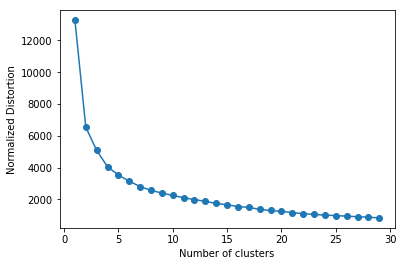

In [11]:
distortions=np.array(distortions)
plt.plot(range(1,30),distortions*(1/len(allwords)), marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Normalized Distortion')
#plt.yscale('log')
#plt.ylim(1e+5,1e+8)
plt.show()


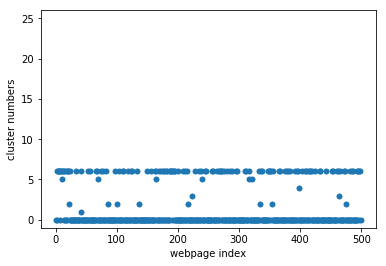

In [17]:
plt.scatter(range(1,len(prediction_clusters[25])+1),prediction_clusters[25],)
plt.ylim(-1,26)
plt.xlabel('webpage index')
plt.ylabel('cluster numbers')
plt.show()

In [18]:
tmp=prediction_clusters[25]
fileindex=[]
clusterfilename=[]
for i in range (max(tmp)+1):
    tmp2=[]
    for j,k in enumerate(tmp):
        if k==i:
            tmp2.append(j)
    fileindex.append(tmp2)
    clusterfilename.append([list_of_files[x][-12:-6] for x in fileindex[i]])

In [19]:
#cluster=[list_of_files[x][-12:-6] for x in fileindex]
print("cluster0 files {}".format(clusterfilename[0]))

print("cluster25 files {}".format(clusterfilename[6]))

cluster0 files ['000051', '000087', '000206', '000499', '000720', '000801', '000852', '001522', '001637', '001652', '001869', '001953', '001961', '002077', '002089', '002139', '002198', '002316', '002380', '002455', '002636', '002645', '002740', '002951', '003354', '003650', '003776', '003819', '003943', '004094', '004145', '004261', '004271', '004401', '004436', '004613', '004634', '004638', '004653', '004670', '004732', '004812', '004842', '004908', '004930', '005059', '005381', '005692', '005700', '005730', '006063', '006212', '006456', '006467', '006572', '006600', '006635', '006828', '006931', '007212', '007265', '007350', '007407', '007632', '007715', '007716', '007884', '007931', '008324', '008354', '008490', '008545', '008735', '008911', '008978', '009003', '009007', '009047', '009258', '009265', '009326', '009363', '009368', '009449', '009535', '009585', '009601', '009619', '009769', '010098', '010141', '010192', '010241', '010292', '010324', '010431', '010524', '010655', '010

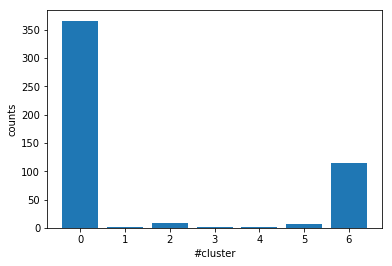

In [20]:
plt.bar(range(max(tmp)+1),height=[len(x) for x in fileindex],align='center')
#plt.yscale('log')
plt.xlabel('#cluster')
plt.ylabel('counts')
plt.show()